<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Numerical Integration - The Gauss-Lobatto-Legendre approach</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* Stephanie Wollherr ([@swollherr](https://github.com/swollherr))
* Florian Wölfl ([@flo-woelfl](https://github.com/flo-woelfl))
---

The following notebook presents a basic integration scheme that we're going to use in the Spectral Element Code as well as in the Discontinuous Galerkin Code to calculate the entries of the mass and stiffness matrices.

**Fundamental principal:**<br>
Replace the function $f(x)$ that we want to integrate by a polynomial approximation that can be integrated analytically.

As interpolating functions we use the Lagrange polynomials $l_i$ and obtain the following integration scheme for an arbitrary function $f(x)$ defined on the interval $[-1,1]$ :
\begin{eqnarray*} \int_{-1}^1 f(x) \ dx \approx \int _{-1}^1 P_N(x) dx = \sum_{i=1}^{N+1} w_i f(x_i) \end{eqnarray*}
with 
\begin{eqnarray*}
    P_N(x)= \sum_{i=1}^{N+1} f(x_i) \ l_i^{(N)}(x).
\end{eqnarray*}
As collocation points we use the Gauss-Lobatto-Legendre points $x_i$ and the corresponding weights that are needed to evaluate the integral are calculated as follows:
\begin{eqnarray*} w_i= \int_{-1}^1 l_i^{(N)}(x) \ dx \end{eqnarray*}.

## Exercises
We want to investigate the performance of
the numerical integration scheme. You can use the `gll()` routine to
obtain the differentiation weights $w_i$ for an
arbitrary function f(x) and the relevant integration points $x_i$. 

### 1. Numerical integration of an arbritrary function:
Define a function $f(x)$
of your choice and calculate analytically the
integral $\int f(x) \ dx$ for the interval $[−1, 1]$. Perform the integration numerically and compare the results. 

### 2. The order of integration
Modify the function and
the order of the numerical integration. Discuss the results.

### Have fun!

In [1]:
# This is a configuration step for the exercise. Please run it before the simulation code!
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

from gll import gll
from lagrange2 import lagrange2

# Prettier plots.
plt.style.use('ggplot')

Give order of integration: 3
Solution of the analytical integral: 0
Solution of the numerical integral: 2.04108e-17


<IPython.core.display.Javascript object>


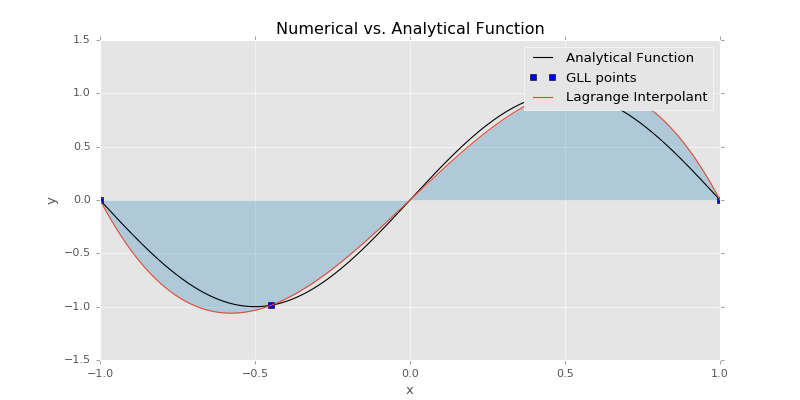

In [2]:
# Exercise for Gauss integration

n = 1000 
x = np.linspace(-1, 1, n)

# MODIFY f and intf to test different functions!
f = np.sin(x * np.pi) 

# Analytical value of the DEFINITE integral from -1 to 1
intf = 1.0 / np.pi * (-np.cos(1.0 * np.pi) + np.cos(-1.0 * np.pi))

# Choose order
N =int(input('Give order of integration: '))

# Get integration points and weights from the gll routine
xi, w = gll(N)

# Initialize function at points xi
fi = np.interp(xi, x, f)

# Evaluate integral
intfn = 0
for i in range(len(w)):
    intfn = intfn + w[i] * fi[i]

# Calculate Lagrange Interpolant for plotting purposes.
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange2(N, j, x[i], xi)
s = np.zeros_like(x)
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]
    
print('Solution of the analytical integral: %g' % intf)
print('Solution of the numerical integral: %g' % intfn)

# Plot results.
plt.figure(figsize=(10, 5))
plt.plot(x, f, 'k-', label='Analytical Function')

plt.plot(xi, fi, 'bs', label='GLL points')
plt.plot(x, s, label='Lagrange Interpolant')
plt.fill_between(x, s, np.zeros_like(x), alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs. Analytical Function')

plt.legend()
plt.show()